In [ ]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ratings_df = pd.read_csv("/content/drive/MyDrive/dataset/ratings_and_sentiments.csv",encoding='ISO-8859-1')

In [ ]:
ratings_df = ratings_df.drop_duplicates()
ratings_df = ratings_df.replace('#VALUE!', np.nan)
ratings_df['vibe_sent'] = pd.to_numeric(ratings_df['vibe_sent'])
ratings_df['parking_sent'] = pd.to_numeric(ratings_df['vibe_sent'])
ratings_df['coffee_sent'] = pd.to_numeric(ratings_df['coffee_sent'])
ratings_df['food_sent'] = pd.to_numeric(ratings_df['food_sent'])
shops_df = pd.pivot_table(ratings_df, index = 'coffee_shop_name')

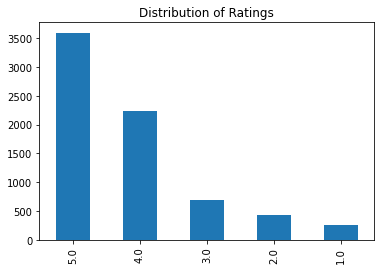

In [ ]:
ratings_df['num_rating'].value_counts().plot(kind='bar', title = 'Distribution of Ratings')

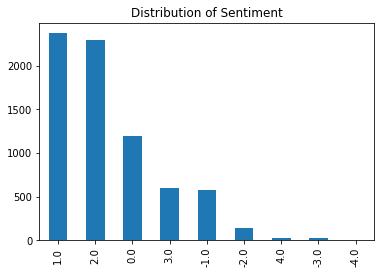

In [ ]:
overall_sent_ser = ratings_df['overall_sent'].value_counts()
overall_sent_ser.plot(kind='bar', title = 'Distribution of Sentiment')

In [ ]:
ratings_df.mean()

num_rating       4.173202
bool_HIGH        0.807676
overall_sent     1.097547
vibe_sent        0.370100
tea_sent         0.046280
service_sent     0.326729
seating_sent     0.122489
price_sent       0.020091
parking_sent     0.370100
location_sent    0.075655
alcohol_sent     0.041291
coffee_sent      0.512749
food_sent        0.355183
hours_sent       0.031042
internet_sent    0.025634
local_sent       0.037412
dtype: float64

In [ ]:
def categorize_rating(row):
    num = row['num_rating']
    if num == 5.0:
        return "good"
    elif num == 4.0:
        return "neutral"
    else:
        return "bad"

ratings_df['cat_rating'] = ratings_df.apply(categorize_rating, axis = 1)

Average sentiment:  1.4785634743875278


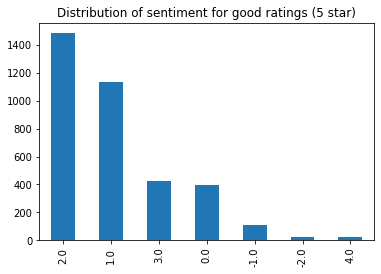

In [ ]:
mask = ratings_df['cat_rating'] == "good"
good_ratings_ser = ratings_df[mask]['overall_sent'].value_counts()
print( "Average sentiment: ", ratings_df[mask]['overall_sent'].mean())
good_ratings_ser.plot(kind = 'bar', title = "Distribution of sentiment for good ratings (5 star)")

Average sentiment:  1.1685292802860974


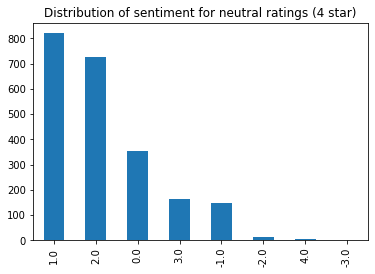

In [ ]:
mask = ratings_df['cat_rating'] == "neutral"
neutral_ratings_ser = ratings_df[mask]['overall_sent'].value_counts()
print("Average sentiment: ", (ratings_df[mask]['overall_sent'].mean()))
neutral_ratings_ser.plot(kind = 'bar', title = "Distribution of sentiment for neutral ratings (4 star)")

Average sentiment:  -0.002881844380403458


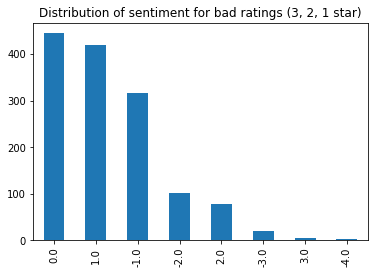

In [ ]:
mask = ratings_df['cat_rating'] == "bad"
bad_ratings_ser = ratings_df[mask]['overall_sent'].value_counts()
print("Average sentiment: ", (ratings_df[mask]['overall_sent'].mean()))
bad_ratings_ser.plot(kind = 'bar', title = "Distribution of sentiment for bad ratings (3, 2, 1 star)")

In [ ]:
compare_sent_of_ratings_df = pd.concat([overall_sent_ser, good_ratings_ser, neutral_ratings_ser, bad_ratings_ser], axis=1)
compare_sent_of_ratings_df.columns = ['all_reviews','good_reviews','neutral_reviews','bad_reviews']

def calc_percent_change(row, col):
    try:
        col_pc = row[col]/compare_sent_of_ratings_df[col].sum()
        all_pc = row['all_reviews']/compare_sent_of_ratings_df['all_reviews'].sum()
        pc_change = (col_pc - all_pc) / all_pc 
    except:
        pc_change = None
    return pc_change

columns = ['good_reviews','neutral_reviews','bad_reviews']
for c in columns:
    c_new = "PC_" + c
    compare_sent_of_ratings_df[c_new] = compare_sent_of_ratings_df.apply(calc_percent_change, args = (c,) ,axis = 1)

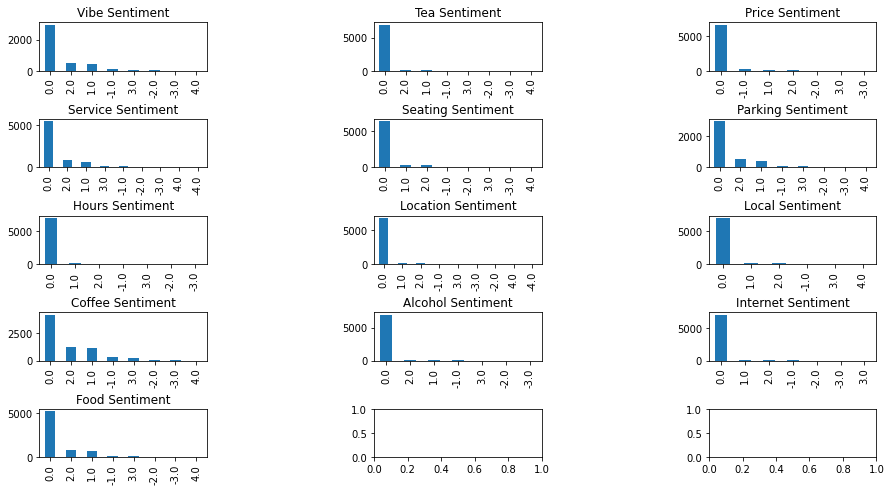

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3)
fig.subplots_adjust(hspace=1, wspace = 1)
ratings_df['vibe_sent'].value_counts().plot(kind = 'bar',ax=axes[0,0], title = 'Vibe Sentiment',figsize=(15,8))
ratings_df['tea_sent'].value_counts().plot(kind = 'bar',ax=axes[0,1], title = 'Tea Sentiment')
ratings_df['service_sent'].value_counts().plot(kind = 'bar',ax=axes[1,0], title = 'Service Sentiment')
ratings_df['seating_sent'].value_counts().plot(kind = 'bar',ax=axes[1,1], title = 'Seating Sentiment')
ratings_df['price_sent'].value_counts().plot(kind = 'bar',ax=axes[0,2], title = 'Price Sentiment')
ratings_df['parking_sent'].value_counts().plot(kind = 'bar',ax=axes[1,2], title = 'Parking Sentiment')
ratings_df['location_sent'].value_counts().plot(kind = 'bar',ax=axes[2,1], title = 'Location Sentiment')
ratings_df['alcohol_sent'].value_counts().plot(kind = 'bar',ax=axes[3,1], title = 'Alcohol Sentiment')
ratings_df['coffee_sent'].value_counts().plot(kind = 'bar',ax=axes[3,0], title = 'Coffee Sentiment')
ratings_df['food_sent'].value_counts().plot(kind = 'bar',ax=axes[4,0], title = 'Food Sentiment')
ratings_df['hours_sent'].value_counts().plot(kind = 'bar',ax=axes[2,0], title = 'Hours Sentiment')
ratings_df['internet_sent'].value_counts().plot(kind = 'bar',ax=axes[3,2], title = 'Internet Sentiment')
ratings_df['local_sent'].value_counts().plot(kind = 'bar',ax=axes[2,2], title = 'Local Sentiment')

In [ ]:
compare_df = pd.concat([ratings_df.mean(),ratings_df.std()], axis=1, join='outer')
compare_df.columns = ['mean','std_deviation']
compare_df

,mean,std_deviation
num_rating,4.173202,1.062846
bool_HIGH,0.807676,0.394153
overall_sent,1.097547,1.179282
vibe_sent,0.370100,0.835968
tea_sent,0.046280,0.330990
service_sent,0.326729,0.828535
seating_sent,0.122489,0.516593
price_sent,0.020091,0.373396
parking_sent,0.370100,0.835968
location_sent,0.075655,0.398635


In [ ]:
good_ratings_avg_df = ratings_df[ratings_df['cat_rating'] == "good"].mean()
bad_ratings_avg_df = ratings_df[ratings_df['cat_rating'] == "bad"].mean()
neutral_ratings_avg_df = ratings_df[ratings_df['cat_rating'] == "neutral"].mean()
overall_ratings_avg_df = ratings_df.mean()

compare_att_sent_df = pd.concat([overall_ratings_avg_df, good_ratings_avg_df, neutral_ratings_avg_df, bad_ratings_avg_df], axis=1)
compare_att_sent_df.columns = ['all_reviews','good_reviews','neutral_reviews','bad_reviews']
compare_att_sent_df

,all_reviews,good_reviews,neutral_reviews,bad_reviews
num_rating,4.173202,5.000000,4.000000,2.312680
bool_HIGH,0.807676,1.000000,1.000000,0.000000
overall_sent,1.097547,1.478563,1.168529,-0.002882
vibe_sent,0.370100,0.415025,0.382236,0.199095
tea_sent,0.046280,0.054009,0.044703,0.028818
service_sent,0.326729,0.464644,0.293697,0.023055
seating_sent,0.122489,0.118875,0.164506,0.064121
price_sent,0.020091,0.038976,0.017434,-0.024496
parking_sent,0.370100,0.415025,0.382236,0.199095
location_sent,0.075655,0.075445,0.079571,0.069885


In [ ]:
def calc_percent_change_2(row, col):
    try:
        pc_change = (row[col] - row['all_reviews']) / row['all_reviews'] 
    except:
        pc_change = None
    return pc_change

columns = ['good_reviews','neutral_reviews','bad_reviews']
for c in columns:
    c_new = "PC_" + c
    compare_att_sent_df[c_new] = compare_att_sent_df.apply(calc_percent_change_2, args = (c,) ,axis = 1)

compare_att_sent_df

,all_reviews,good_reviews,neutral_reviews,bad_reviews,PC_good_reviews,PC_neutral_reviews,PC_bad_reviews
num_rating,4.173202,5.000000,4.000000,2.312680,0.198121,-0.041503,-0.445826
bool_HIGH,0.807676,1.000000,1.000000,0.000000,0.238120,0.238120,-1.000000
overall_sent,1.097547,1.478563,1.168529,-0.002882,0.347152,0.064673,-1.002626
vibe_sent,0.370100,0.415025,0.382236,0.199095,0.121387,0.032792,-0.462050
tea_sent,0.046280,0.054009,0.044703,0.028818,0.167013,-0.034073,-0.377297
service_sent,0.326729,0.464644,0.293697,0.023055,0.422109,-0.101098,-0.929438
seating_sent,0.122489,0.118875,0.164506,0.064121,-0.029499,0.343032,-0.476514
price_sent,0.020091,0.038976,0.017434,-0.024496,0.939905,-0.132265,-2.219209
parking_sent,0.370100,0.415025,0.382236,0.199095,0.121387,0.032792,-0.462050
location_sent,0.075655,0.075445,0.079571,0.069885,-0.002766,0.051763,-0.076267


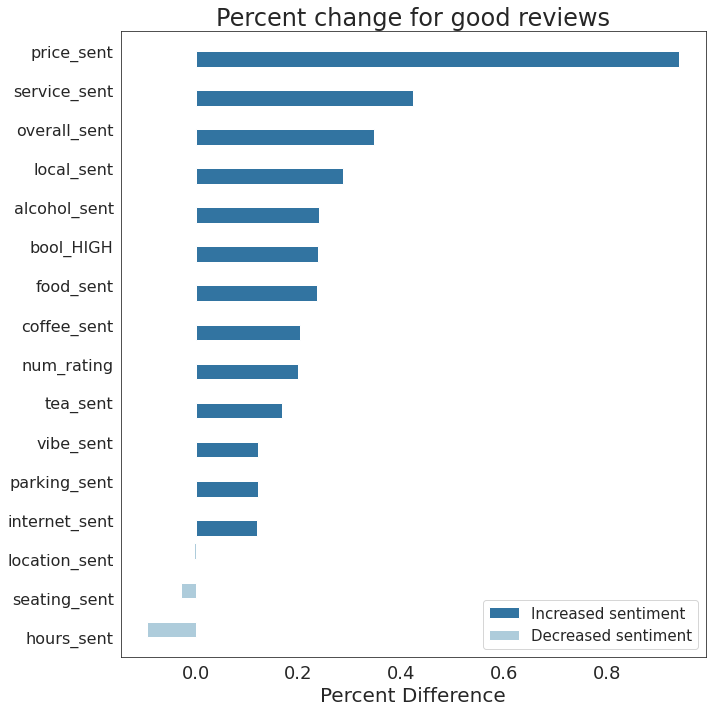

In [ ]:
import seaborn as sns
sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))

sorted_to_chart = compare_att_sent_df.sort_values(by='PC_good_reviews', ascending=False)
sorted_to_chart['dummy'] = sorted_to_chart.PC_good_reviews.apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(10,10))
fig = sns.barplot(y=sorted_to_chart.index, x=sorted_to_chart.PC_good_reviews, hue=sorted_to_chart.dummy)

plt.title('Percent change for good reviews', fontsize=24)
plt.ylabel('')
plt.xlabel('Percent Difference',fontsize=20)
loc, labels = plt.xticks()
yloc, ylabels=plt.yticks()
plt.yticks(fontsize=16)
plt.xticks(fontsize=18)
handles, labels = fig.get_legend_handles_labels()
plt.legend(handles=[handles[1],handles[0]], labels = ['Increased sentiment','Decreased sentiment'], loc=0, fontsize=15 )
plt.tight_layout()
plt.show()

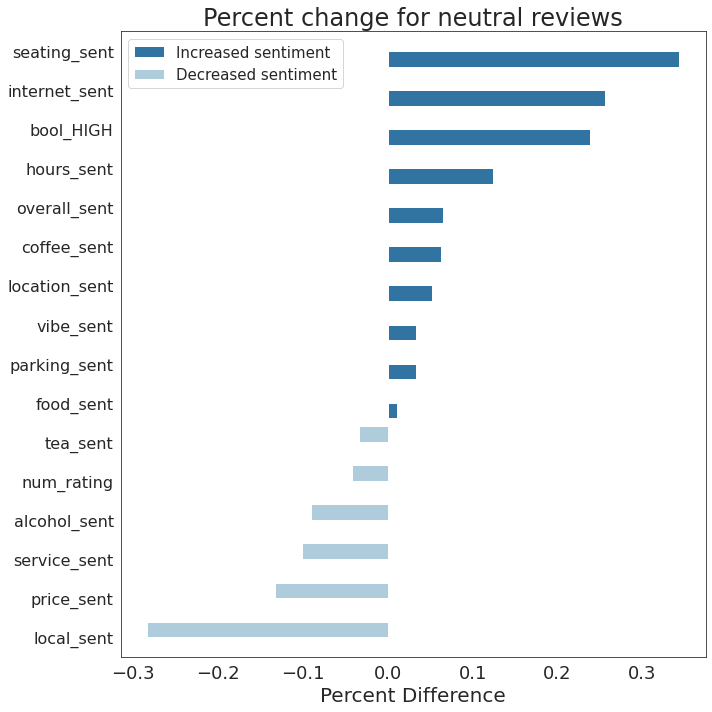

In [ ]:
sorted_to_chart = compare_att_sent_df.sort_values(by='PC_neutral_reviews', ascending=False)
sorted_to_chart['dummy'] = sorted_to_chart.PC_neutral_reviews.apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(10,10))
fig = sns.barplot(y=sorted_to_chart.index, x=sorted_to_chart.PC_neutral_reviews, hue=sorted_to_chart.dummy)

plt.title('Percent change for neutral reviews', fontsize=24)
plt.ylabel('')
plt.xlabel('Percent Difference',fontsize=20)
loc, labels = plt.xticks()
yloc, ylabels=plt.yticks()
plt.yticks(fontsize=16)
plt.xticks(fontsize=18)
handles, labels = fig.get_legend_handles_labels()
plt.legend(handles=[handles[1],handles[0]], labels = ['Increased sentiment','Decreased sentiment'], loc=0, fontsize=15 )
plt.tight_layout()
plt.show()

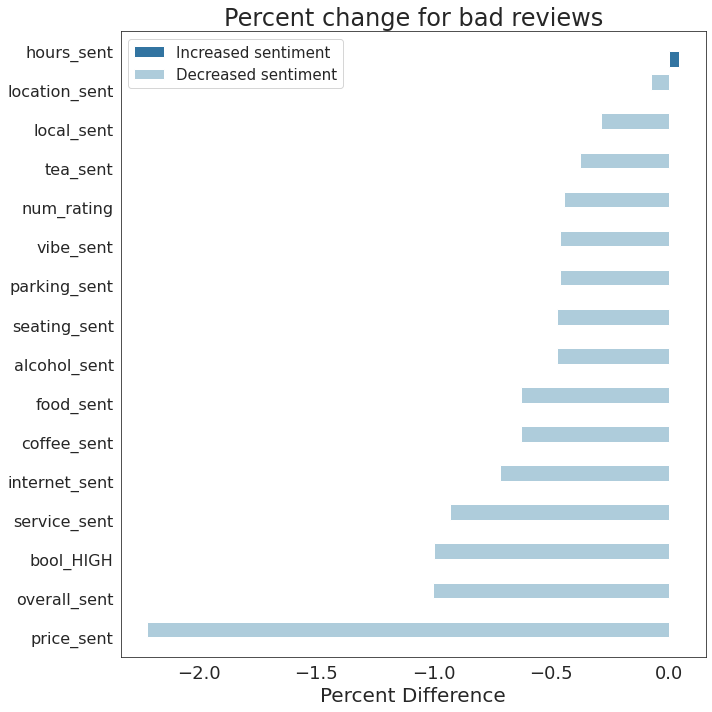

In [ ]:
sorted_to_chart = compare_att_sent_df.sort_values(by='PC_bad_reviews', ascending=False)
sorted_to_chart['dummy'] = sorted_to_chart.PC_bad_reviews.apply(lambda x: 1 if x > 0 else 0)

plt.figure(figsize=(10,10))
fig = sns.barplot(y=sorted_to_chart.index, x=sorted_to_chart.PC_bad_reviews, hue=sorted_to_chart.dummy)

plt.title('Percent change for bad reviews', fontsize=24)
plt.ylabel('')
plt.xlabel('Percent Difference',fontsize=20)
loc, labels = plt.xticks()
yloc, ylabels=plt.yticks()
plt.yticks(fontsize=16)
plt.xticks(fontsize=18)
handles, labels = fig.get_legend_handles_labels()
plt.legend(handles=[handles[1],handles[0]], labels = ['Increased sentiment','Decreased sentiment'], loc=0, fontsize=15 )
plt.tight_layout()
plt.show()

In [ ]:
review_count = ratings_df['coffee_shop_name'].value_counts()
shops_df['num_reviews'] = review_count
shops_df_filter = shops_df[shops_df['num_reviews']>49].sort_values(by=['num_rating'], ascending = False)
top_10_shops_df = shops_df_filter.head(10).reset_index()
bottom_10_shops_df = shops_df_filter.tail(10).reset_index()

The average rating of Top 10 is  4.6285458986449175
The average sentiment of Top 10 is  1.2866932160910751
The average rating of Bottom 10 is  3.742592039800994
The average sentiment of Bottom 10 is  0.8192636815920398


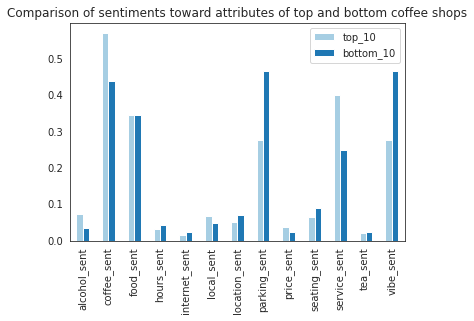

In [ ]:
compare_shops_avg_df = pd.concat([top_10_shops_df.mean(),bottom_10_shops_df.mean()], axis=1)
compare_shops_avg_df.columns = ['top_10','bottom_10']
print("The average rating of Top 10 is ", compare_shops_avg_df['top_10']['num_rating'])
print("The average sentiment of Top 10 is ", compare_shops_avg_df['top_10']['overall_sent'])
print("The average rating of Bottom 10 is ", compare_shops_avg_df['bottom_10']['num_rating'])
print("The average sentiment of Bottom 10 is ", compare_shops_avg_df['bottom_10']['overall_sent'])
plot_df = compare_shops_avg_df.drop(compare_shops_avg_df.index[[1,8,9,16]])
plot_df.plot(kind = 'bar', title = 'Comparison of sentiments toward attributes of top and bottom coffee shops')

In [ ]:
shops_df_filter = shops_df_filter.sort_values(by=['overall_sent'], ascending = False)
top_10_sent_df = shops_df_filter.head(10)
print("TOP SHOPS BY RATING")
print(top_10_shops_df[['coffee_shop_name','overall_sent','num_rating']])
print("\n \n")
print("TOP SHOPS BY SENTIMENT")
print(top_10_sent_df[['overall_sent','num_rating']])

TOP SHOPS BY RATING
                       coffee_shop_name  overall_sent  num_rating
0  Third Coast Coffee Roasting Company       1.071429    4.821429
1               Venezia Italian Gelato       1.780000    4.810000
2                         Fleet Coffee       1.228070    4.701754
3                           Dolce Neve       1.520000    4.640000
4            Anderson's Coffee Company       1.150000    4.620000
5                    Flat Track Coffee       1.142857    4.571429
6                 Apanas Coffee & Beer       1.474576    4.550847
7                        Corona Coffee       1.270000    4.530000
8                Summermoon Coffee Bar       1.180000    4.530000
9                      Live Oak Market       1.050000    4.510000

 

TOP SHOPS BY SENTIMENT
                                 overall_sent  num_rating
coffee_shop_name                                         
Venezia Italian Gelato               1.780000    4.810000
The Factory - Cafe With a Soul       1.580645    4.37